In this kernel we are focusing on data preprocessing and data visualisation of New York City Airbnb Open Data
Airbnb listings and metrics in NYC, NY, USA (2019)for Classification.

### Data

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.<br>

This data contains 16 columns, 47905 unique values(samples).  Imported all necessary files and libraries, We removed unnecessary data from the datset like last review, reviews per month and host name as they donot support the data required. We filled the null values with zero constant and did the visualization using seaborn, pyplot, matplotlib.<br>

#### Variables
id: listing ID<br>
name: name of the listing<br>
host_id: host ID<br>
host_name: name of the host<br>
neighbourhood_group: location<br>
neighbourhood: area<br>
latitude: latitude coordinateslatitude: latitude coordinates<br>
longitude: longitude coordinates<br>
room_type: listing space type<br>
price: price in dollars<br>
minimum_nights: amount of nights minimum<br>
number_of_reviews: number of reviews<br>
last_review: latest review<br>
reviews_per_month: number of reviews per month<br>
calculated_host_listings_count: amount of listing per host<br>
availability_365: number of days when listing is available for booking<br>
link: __[NY_AIRBNB_DATASET](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)__


In [ ]:
#import required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [ ]:
#read the file 'AirBnb.txt' from the file
df=pd.read_csv('AirBnb.txt')

In [ ]:
#check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#view dataframe
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#no of columns and no of rows
df.shape

(48895, 16)

In [ ]:
#dataframe description
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [ ]:
#finding out the number of null values by field
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#delete the column 'host_name'
del df['host_name']

In [ ]:
#delete the row 'last_review'
#del df['last_review']

In [ ]:
#replace null names with "No Name"
df.name.fillna("No Name", inplace = True)

In [ ]:
df.loc[df['name'] =="No Name"]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,No Name,6676776,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,No Name,11395220,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,No Name,20700823,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,No Name,22686810,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,No Name,21600904,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,No Name,1832442,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,No Name,24625694,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,No Name,31147528,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,No Name,33377685,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,No Name,50448556,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [ ]:
#replace null review_per_month with 0
df.reviews_per_month.fillna(0, inplace = True)
df.last_review.fillna(0, inplace = True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,1.090910e+00,1.597283e+00,0.00000,4.000000e-02,3.700000e-01,1.580000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [ ]:
df.loc[df['price'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 23161 to 26866
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11 non-null     int64  
 1   name                            11 non-null     object 
 2   host_id                         11 non-null     int64  
 3   neighbourhood_group             11 non-null     object 
 4   neighbourhood                   11 non-null     object 
 5   latitude                        11 non-null     float64
 6   longitude                       11 non-null     float64
 7   room_type                       11 non-null     object 
 8   price                           11 non-null     int64  
 9   minimum_nights                  11 non-null     int64  
 10  number_of_reviews               11 non-null     int64  
 11  last_review                     11 non-null     object 
 12  reviews_per_month              

In [ ]:
df.loc[df['price'] == 0,["neighbourhood","room_type"]].drop_duplicates().head()

,neighbourhood,room_type
23161,Bedford-Stuyvesant,Private room
25433,East Morrisania,Private room
25634,Bushwick,Private room
25753,Greenpoint,Private room
25778,Williamsburg,Entire home/apt


In [ ]:
df.loc[(df['price'] != 0) & (df['neighbourhood'] == "Bushwick") & (df['room_type'] == "Private room"),"price"].mean()

62.65948777648428

In [ ]:
df.loc[(df['price'] != 0) & (df['neighbourhood'] == "Greenpoint") & (df['room_type'] == "Private room"),"price"].mean()

88.64842105263158

In [ ]:
df.loc[(df['price'] != 0) & (df['neighbourhood'] == "Bedford-Stuyvesant") & (df['room_type'] == "Private room"),"price"].mean()

73.4410029498525

In [ ]:
df.loc[(df['price'] != 0) & (df['neighbourhood'] == "East Morrisania") & (df['room_type'] == "Private room"),"price"].mean()

78.33333333333333

In [ ]:
df.loc[(df['price'] != 0) & (df['neighbourhood'] == "Williamsburg") & (df['room_type'] == "Entire home/apt"),"price"].mean()

206.2031746031746

In [ ]:
df.loc[(df['price'] != 0) & (df['neighbourhood'] == "Murray Hill") & (df['room_type'] == "Entire home/apt"),"price"].mean()

238.4497487437186

In [ ]:
df.loc[(df['price'] != 0) & (df['neighbourhood'] == "Bushwick") & (df['room_type'] == "Shared room"),"price"].mean()

38.515151515151516

In [ ]:
df.loc[(df['price'] == 0) & (df['neighbourhood'] == "Bushwick") & (df['room_type'] == "Private room"),"price"] = 63

In [ ]:
df.loc[(df['price'] == 0) & (df['neighbourhood'] == "Greenpoint") & (df['room_type'] == "Private room"),"price"] = 89

In [ ]:
df.loc[(df['price'] == 0) & (df['neighbourhood'] == "Bedford-Stuyvesant") & (df['room_type'] == "Private room"),"price"] = 73

In [ ]:
df.loc[(df['price'] == 0) & (df['neighbourhood'] == "East Morrisania") & (df['room_type'] == "Private room"),"price"] = 78

In [ ]:
df.loc[(df['price'] == 0) & (df['neighbourhood'] == "Williamsburg") & (df['room_type'] == "Entire home/apt"),"price"] = 206

In [ ]:
df.loc[(df['price'] == 0) & (df['neighbourhood'] == "Murray Hill") & (df['room_type'] == "Entire home/apt"),"price"] = 238

In [ ]:
df.loc[(df['price'] == 0) & (df['neighbourhood'] == "Bushwick") & (df['room_type'] == "Shared room"),"price"] = 39

In [ ]:
df.loc[df['price'] == 0,["neighbourhood","room_type"]].drop_duplicates().head()

,neighbourhood,room_type


In [ ]:
df.loc[df['price'].isnull() == True,["neighbourhood","room_type"]].drop_duplicates().head()

,neighbourhood,room_type


In [ ]:
df['price'].groupby(df["neighbourhood_group"]).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.57,106.68,10.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.42,186.86,10.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.89,291.38,10.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.52,167.10,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.81,277.62,13.0,50.0,75.0,110.0,5000.0


In [ ]:
df1 = df.copy()
df1['bucket'] = pd.qcut(df1['price'], q=10, precision=0)

In [ ]:
df1.groupby(["neighbourhood_group","bucket"])['neighbourhood_group'].count().head(100)

neighbourhood_group  bucket          
Bronx                (9.0, 49.0]          313
                     (49.0, 60.0]         185
                     (60.0, 75.0]         162
                     (75.0, 90.0]         128
                     (90.0, 106.0]         91
                     (106.0, 130.0]        79
                     (130.0, 155.0]        57
                     (155.0, 200.0]        31
                     (200.0, 269.0]        11
                     (269.0, 10000.0]      34
Brooklyn             (9.0, 49.0]         2742
                     (49.0, 60.0]        2663
                     (60.0, 75.0]        2600
                     (75.0, 90.0]        2076
                     (90.0, 106.0]       1912
                     (106.0, 130.0]      2195
                     (130.0, 155.0]      1753
                     (155.0, 200.0]      2107
                     (200.0, 269.0]       906
                     (269.0, 10000.0]    1150
Manhattan            (9.0, 49.0]          

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


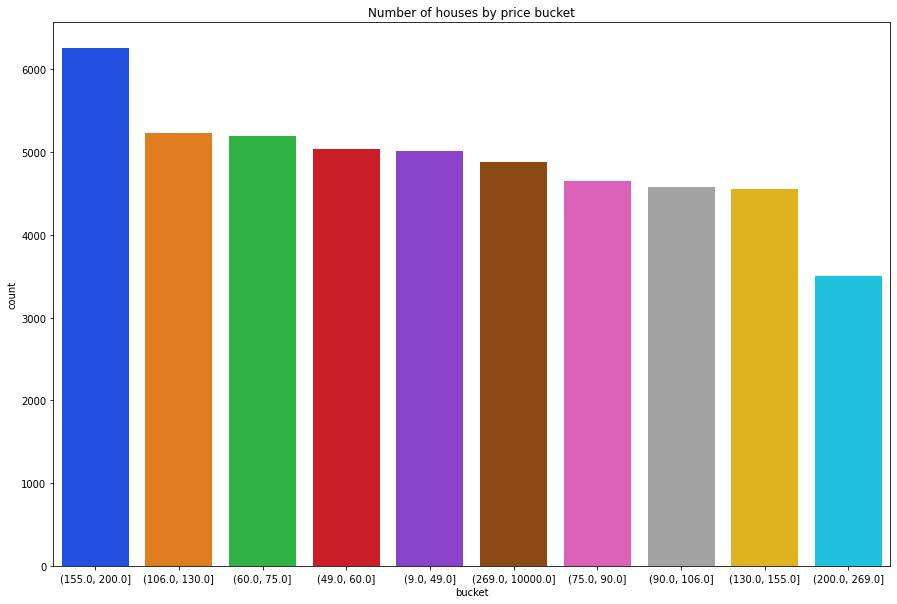

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Number of houses by price bucket")
ax = sns.countplot(df1["bucket"], order = df1['bucket'].value_counts().index, palette="bright" ) 

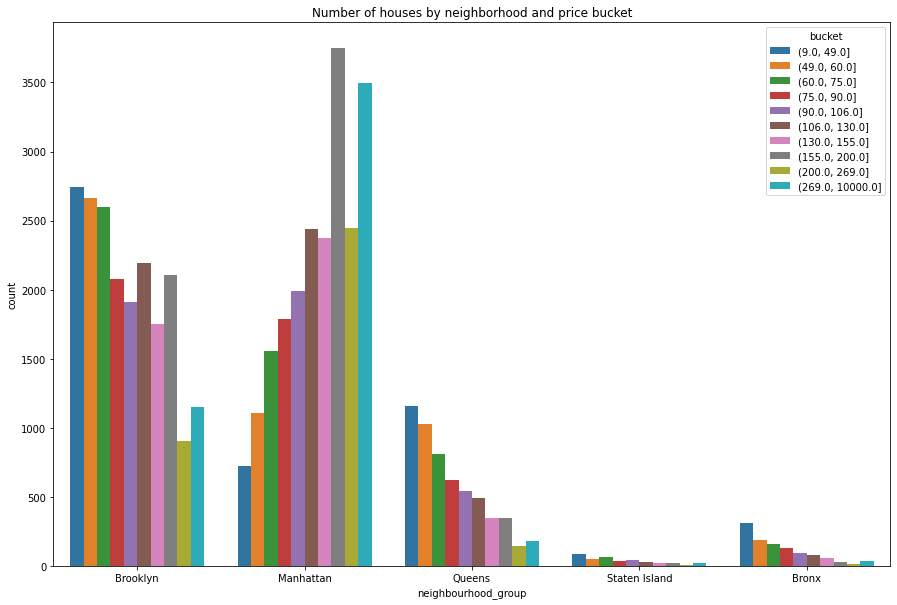

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Number of houses by neighborhood and price bucket")
ax = sns.countplot(x="neighbourhood_group", hue="bucket", data=df1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


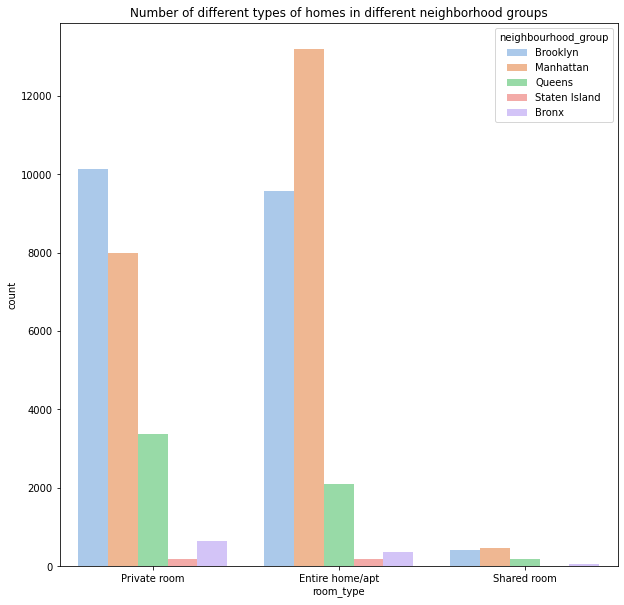

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Number of different types of homes in different neighborhood groups")
ax = sns.countplot(df1['room_type'],hue=df1['neighbourhood_group'], palette='pastel')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


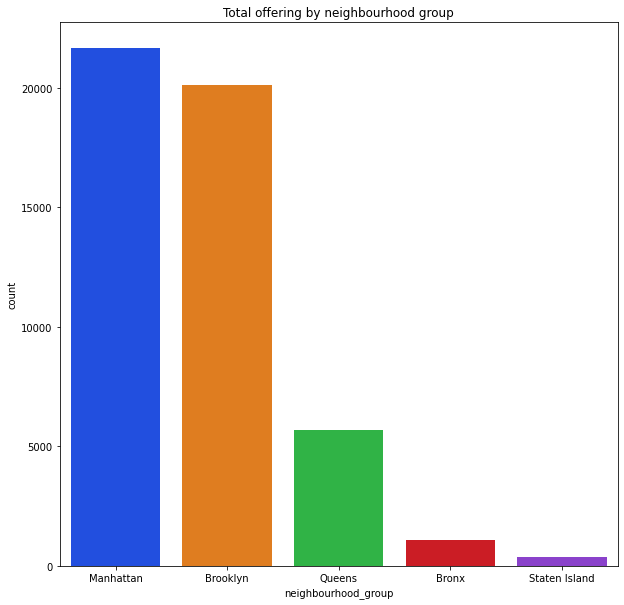

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Total offering by neighbourhood group")
ax = sns.countplot(df1["neighbourhood_group"], order = df1['neighbourhood_group'].value_counts().index, palette="bright" ) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


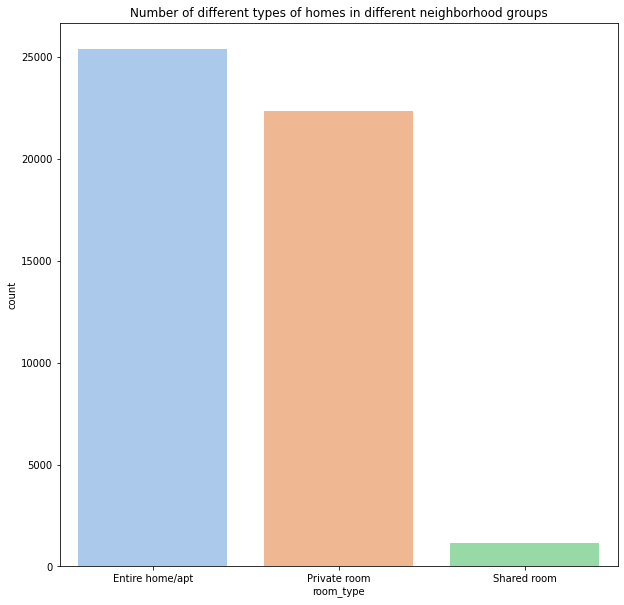

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Number of different types of homes in different neighborhood groups")
ax = sns.countplot(df1['room_type'], order = df1['room_type'].value_counts().index, palette='pastel')

In [ ]:
#fill NaN data with 0 in the dataframe
#df.fillna('0',inplace=True)

In [ ]:
#find if there are any null values in the dataset
df.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#@title Default title text
#remove the null values from the dataset

#df=df[~(df['name']=='0')]
#df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.4,1,0
7,5178,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [ ]:
#categorize the neighbourhood group into categories
#df.neighbourhood_group = df.neighbourhood_group.astype('category')

In [ ]:
#print the categories in neighbourhood group
#df.neighbourhood_group.cat.categories

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object')

In [ ]:
#group the data by neighbourhood and room type
pd.crosstab(df.neighbourhood_group, df.room_type)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [ ]:
df.groupby(['neighbourhood_group','room_type'])['price'].mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.907975
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.349095
                     Private room        76.543920
                     Shared room         50.716707
Manhattan            Entire home/apt    249.257141
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

In [ ]:
pd.set_option('max_rows', 99999)
df.groupby(['neighbourhood_group','neighbourhood','room_type'])['price'].mean()

neighbourhood_group  neighbourhood               room_type      
Bronx                Allerton                    Entire home/apt    123.062500
                                                 Private room        65.769231
                                                 Shared room               NaN
                     Arden Heights               Entire home/apt           NaN
                                                 Private room              NaN
                                                 Shared room               NaN
                     Arrochar                    Entire home/apt           NaN
                                                 Private room              NaN
                                                 Shared room               NaN
                     Arverne                     Entire home/apt           NaN
                                                 Private room              NaN
                                                 Shared room      

In [ ]:
#df.groupby(['neighbourhood_group','room_type'])['price'].agg(['min', 'max', 'mean','median'])
df.groupby(['neighbourhood_group'])['price'].agg(['min', 'max', 'mean','median'])

,min,max,mean,median
neighbourhood_group,,,,
Bronx,10,2500,87.568286,65
Brooklyn,10,10000,124.419419,90
Manhattan,10,10000,196.886801,150
Queens,10,10000,99.517649,75
Staten Island,13,5000,114.812332,75


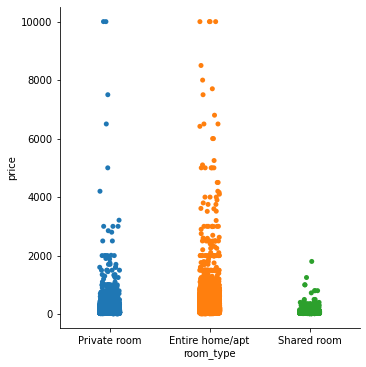

In [ ]:
#catplot room type and price
#sns.catplot(x="room_type", y="price", data=df);

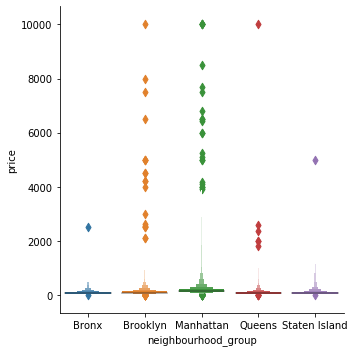

In [ ]:
#catplot neighbourhood_group and price
#sns.catplot(x="neighbourhood_group", y="price", kind="boxen",
#            data=df);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


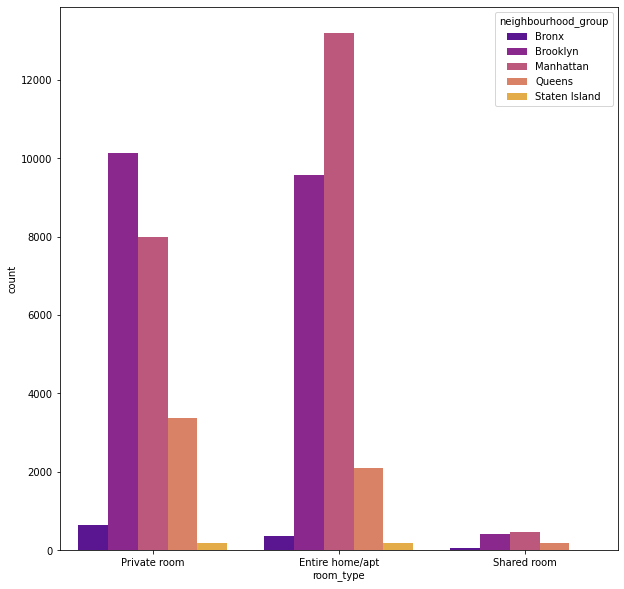

In [ ]:
# create countplot roomtype and neighbourhood type
plt.figure(figsize=(10,10))
myPlot = sns.countplot(df['room_type'],hue=df['neighbourhood_group'], palette='plasma')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


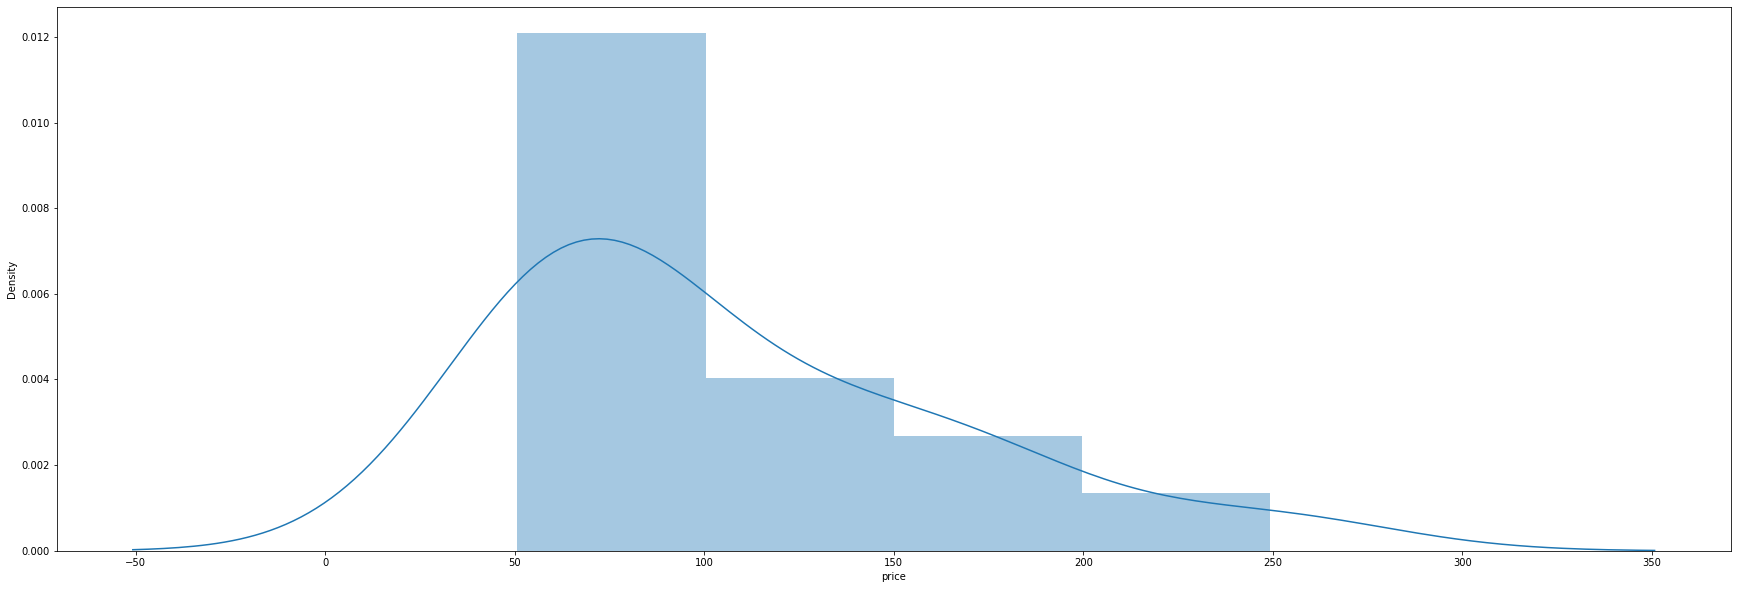

In [ ]:
# create countplot roomtype and neighbourhood type
plt.figure(figsize=(30,10))
myPlot = sns.distplot(df.groupby(['neighbourhood_group','room_type'])['price'].mean())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


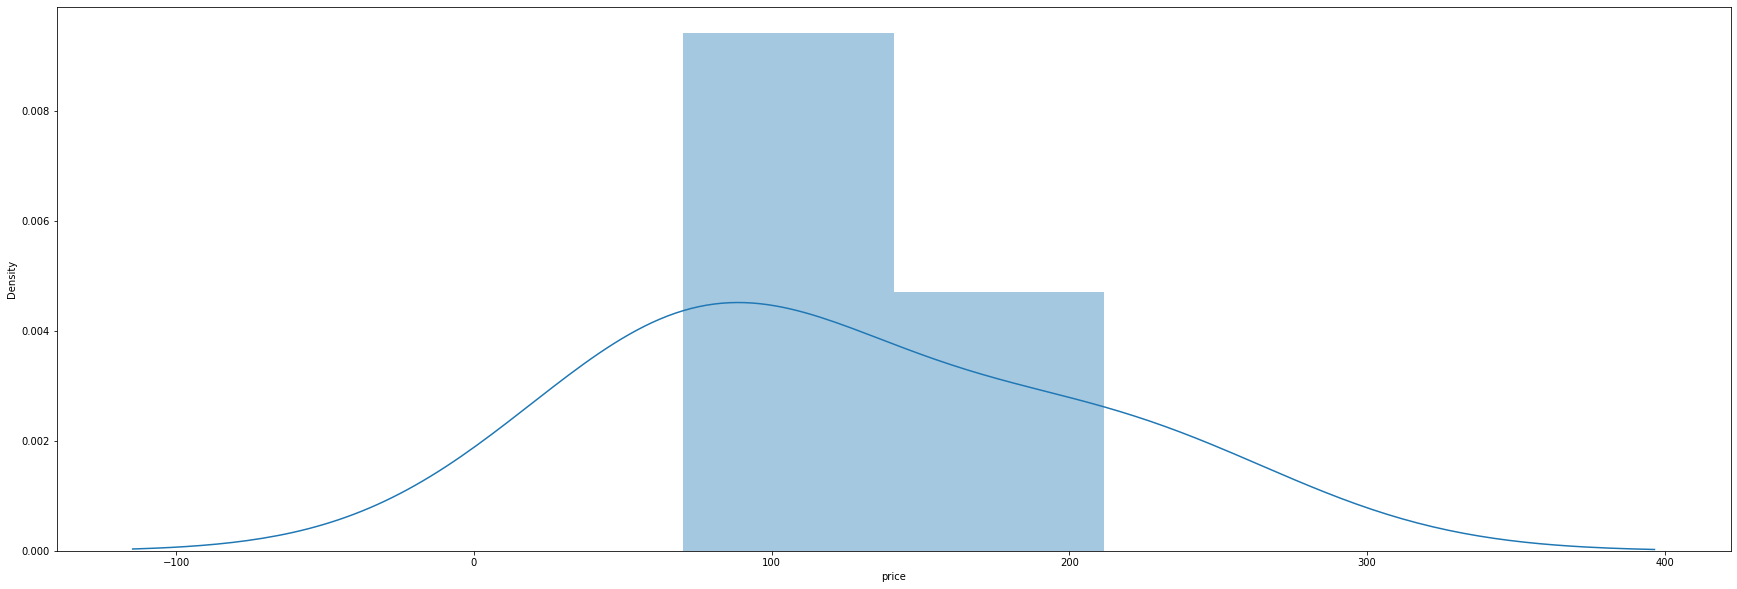

In [ ]:
# create countplot roomtype and neighbourhood type
plt.figure(figsize=(30,10))
myPlot = sns.distplot(df.groupby(['room_type'])['price'].mean())

In [ ]:
#df['price'].groupby(df["neighbourhood_group"]).describe().round(2)
df['price'].mean()

152.7420390632989

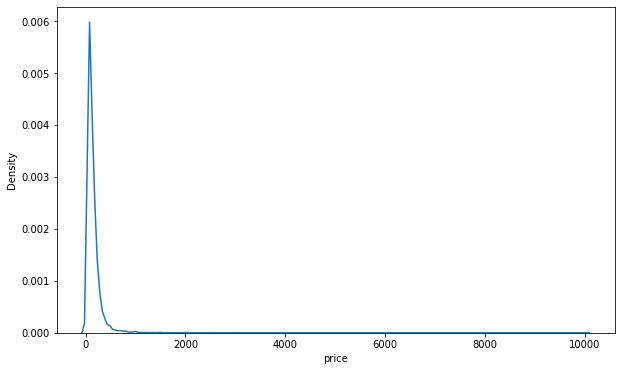

In [ ]:
# create countplot roomtype and neighbourhood type
plt.figure(figsize=(10,6))
myPlot = sns.kdeplot(df['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


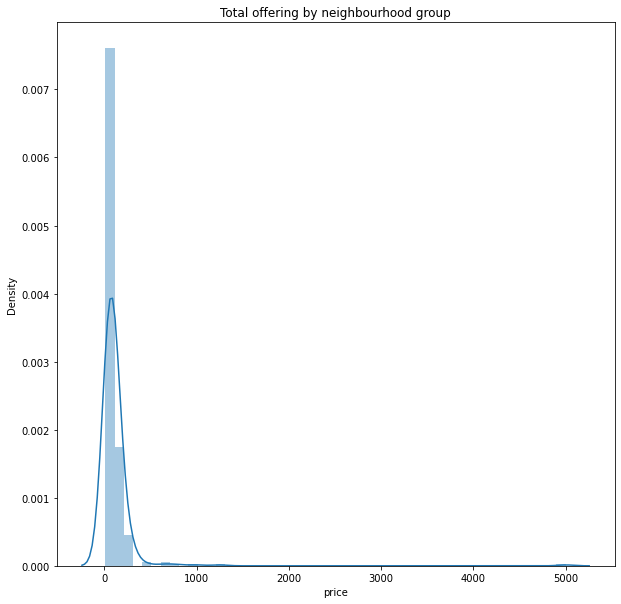

In [ ]:
#temp = df.loc[df["neighbourhood_group"]=='Staten Island']
#plt.figure(figsize=(10,10))
#plt.title("Total offering by neighbourhood group")
#ax = sns.distplot(temp["price"]) 

In [ ]:
df.groupby(["room_type"])["room_type"].unique()

room_type
Entire home/apt    [Entire home/apt]
Private room          [Private room]
Shared room            [Shared room]
Name: room_type, dtype: object

In [ ]:
df.groupby(["neighbourhood_group"])["neighbourhood_group"].unique()

neighbourhood_group
Bronx                  ['Bronx']
Categories (1, object): ['Bronx']
Brooklyn         ['Brooklyn']
Categories (1, object): ['Brooklyn']
Manhattan        ['Manhattan']
Categories (1, object): ['Manhat...
Queens               ['Queens']
Categories (1, object): ['Queens']
Staten Island    ['Staten Island']
Categories (1, object): ['St...
Name: neighbourhood_group, dtype: object

In [ ]:
import scipy.stats as st

alpha = 0.05

bck = df2[(df2['room_type'] == 'Private room') & (df2['neighbourhood_group'] == 'Bronx')]
bck1 = df2[(df2['room_type'] == 'Private room') & (df2['neighbourhood_group'] == 'Queens')]
bck2 = df2[(df2['room_type'] == 'Private room') & (df2['neighbourhood_group'] == 'Brooklyn')]
bck3 = df2[(df2['room_type'] == 'Private room') & (df2['neighbourhood_group'] == 'Manhattan')]
bck4 = df2[(df2['room_type'] == 'Private room') & (df2['neighbourhood_group'] == 'Staten Island')]
#bck = df2[(df2['room_type'] == 'Shared room']
#bck1 = df2[(df2['room_type'] == 'Entire home/apt']

#st.f_oneway(bck.price,bck1.price,bck2.price,bck3.price,bck4.price)
stat, p = st.kruskal(bck.price,bck1.price,bck2.price,bck3.price,bck4.price)

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=595.886, p=0.000
Different distributions (reject H0)


In [ ]:
bck = df2[(df2['room_type'] == 'Shared room') & (df2['neighbourhood_group'] == 'Bronx')]
bck1 = df2[(df2['room_type'] == 'Shared room') & (df2['neighbourhood_group'] == 'Queens')]
bck2 = df2[(df2['room_type'] == 'Shared room') & (df2['neighbourhood_group'] == 'Brooklyn')]
bck3 = df2[(df2['room_type'] == 'Shared room') & (df2['neighbourhood_group'] == 'Manhattan')]
bck4 = df2[(df2['room_type'] == 'Shared room') & (df2['neighbourhood_group'] == 'Staten Island')]

stat, p = st.kruskal(bck.price,bck1.price,bck2.price,bck3.price,bck4.price)

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=9.299, p=0.054
Same distributions (fail to reject H0)


In [ ]:
bck = df2[(df2['room_type'] == 'Entire home/apt') & (df2['neighbourhood_group'] == 'Bronx')]
bck1 = df2[(df2['room_type'] == 'Entire home/apt') & (df2['neighbourhood_group'] == 'Queens')]
bck2 = df2[(df2['room_type'] == 'Entire home/apt') & (df2['neighbourhood_group'] == 'Brooklyn')]
bck3 = df2[(df2['room_type'] == 'Entire home/apt') & (df2['neighbourhood_group'] == 'Manhattan')]
bck4 = df2[(df2['room_type'] == 'Entire home/apt') & (df2['neighbourhood_group'] == 'Staten Island')]

stat, p = st.kruskal(bck.price,bck1.price,bck2.price,bck3.price,bck4.price)

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=866.123, p=0.000
Different distributions (reject H0)


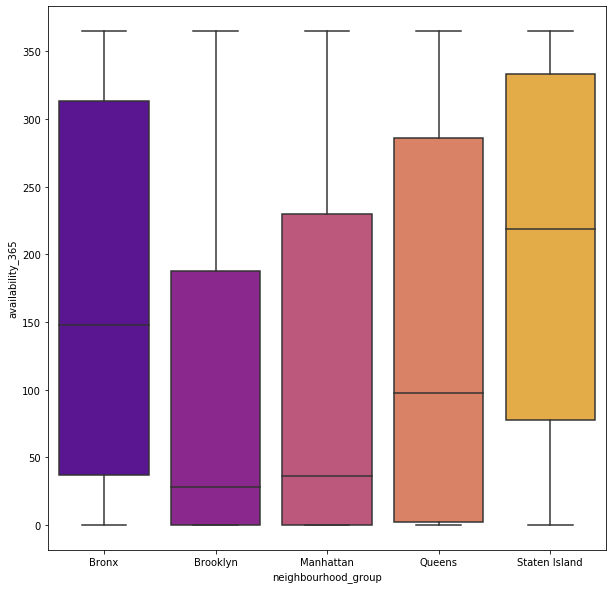

In [ ]:
#boxplot neighbourhood_group and room availability
#plt.figure(figsize=(10,10))
#df1 = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')

In [ ]:
#head
#head=df.head(10)

#### Observation

We can see that lack of giving no reviews effected the data. We removed unnecessary data from the dataset. Lot of apartments are available in manhattan compared to any other place and bronx has less apartments and more single rooms. Apartments cost way more than single rooms. Manhattan and brooklyn has costlier rooms and apartments. The availability of rooms is very less in manhattan and brooklyn and you can find room any day in bronx. There are lot of housing options in manhattan.